# Part 3 - What is the relation between price and a product’s ingredients?

In [98]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import itertools
from itertools import chain, combinations
import scipy.stats as scipystats
import statsmodels.api as sm
import statsmodels.stats.stattools as stools
import statsmodels.stats as stats 
from statsmodels.graphics.regressionplots import *
import seaborn as sns
import copy
from sklearn.model_selection import train_test_split
import math
import time

   After using the random forest in part two, we figure out the important features that affect diabetes, we are interested in the parameter of ‘income’ (ranked #3) to see if it affects the probability of an accurate diabetes diagnosis.  
   
Even if we are aware that price cannot accurately represent "income," it can nonetheless show people some pictures of it since we all know low-income groups cannot always afford expensive goods. Thus, we are still interested in how nutrition affects the price of grocery store items. We are expecting a trend where the higher the unhealthy ingredients in food, the lower the price will be. 

To achieve this goal, we use the web-scraping method to get the data from a local grocery store: Safeway. We chose bread as our main research target. Because bread is typically consumed as a key source of food in the US and comes in a wide range of varieties. Also, based on the personal experiences of our group members, we assumed that the brand of bread has little impact on its pricing.


## Data collection & cleaning 
We want to investigate whether there is a linear relationship between the price of the products and their ingredients. Below is a description of the data set’s parameters that will be judged depending on their effectiveness at making accurate predictions. (proessing [link])


In [99]:
final = pd.read_csv("final.csv")

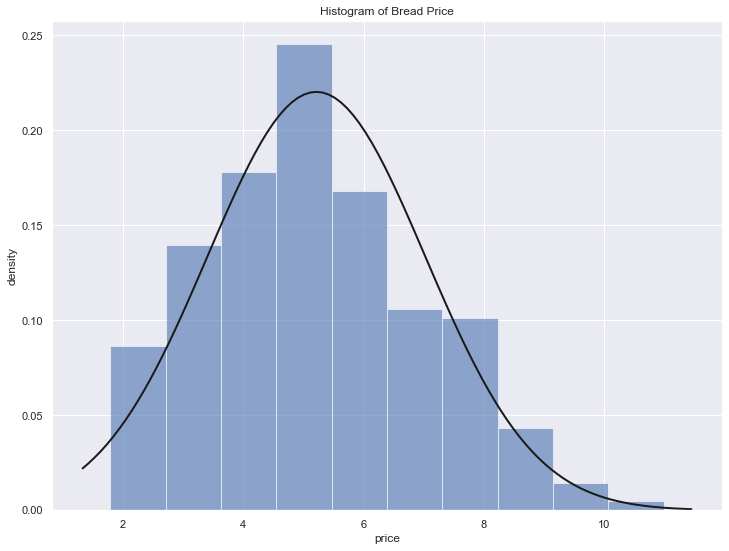

In [509]:
sns.set(rc={'figure.figsize':(12,9)})
mu, std = norm.fit(final['price']) 
plt.hist(final['price'], bins=10, density=True, alpha=0.6, color='b')
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
title = "Fit Values: {:.2f} and {:.2f}".format(mu, std)
plt.title('Histogram of Bread Price')
plt.xlabel('price')
plt.ylabel('density')  
plt.show()

In [101]:
final

,Unnamed: 0,id,Name,price,Calories,Total Fat,Saturated Fat,Trans Fat,Polyunsaturated Fat,Monounsaturated Fat,Cholesterol,Sodium,Potassium,Total Carbohydrate,Dietary Fiber,Total Sugars,Added Sugars,Protein,Calcium,Iron
0,0,196010254,Kings Hawaiian Original Sweet Rolls - 12 Oz.,5.49,90,2,1,0,NaN,NaN,15,75,44.0,15,1,5,5.0,3.0,15,1
1,1,960138380,Daves Killer Bread Organic White Bread Done Ri...,5.49,110,2,0,0,0.0,0.0,0,190,40.0,21,2,2,0.0,3.0,0,0
2,2,194010039,Fresh Baked Signature SELECT Artisan French Br...,1.99,150,1,0,0,NaN,NaN,0,350,90.0,31,1,1,1.0,5.0,10,2
3,3,960287585,Daves Killer Bread White Done Right Thin - 20....,6.99,70,15,0,0,0.0,5.0,0,125,0.0,14,1,2,2.0,2.0,0,4
4,4,194010040,Fresh Baked Signature SELECT A... Style Bread ...,1.99,130,0,0,0,NaN,NaN,0,80,40.0,25,0,0,0.0,4.0,10,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
221,286,113350052,Progresso Bread Crumbs Italian Style - 24 Oz,4.49,100,1,0,0,NaN,NaN,0,400,0.0,18,2,2,2.0,4.0,60,13
222,287,113350002,Progresso Bread Crumbs Italian Style - 15 Oz,3.79,100,1,0,0,NaN,NaN,0,400,0.0,18,2,2,2.0,4.0,60,13
223,288,960039453,Signature SELECT Bread Crumbs Panko - 8 Oz,3.49,100,5,0,0,NaN,NaN,0,100,40.0,21,1,1,1.0,4.0,5,0
224,289,113350003,Progresso Bread Crumbs Plain - 15 Oz,3.79,100,1,0,0,NaN,NaN,0,150,0.0,18,2,2,2.0,4.0,50,13


In [130]:
dep_variable = final[[ 'Total Fat',
                'Cholesterol','Sodium', 
                "Potassium", 'Total Sugars',
                'Dietary Fiber','Calcium',"Iron",
                "Calories",'Added Sugars','Total Carbohydrate', 'Saturated Fat','Protein']]

In [103]:
#outlier index
np.where(final['price']>10)

(array([194]),)

In [104]:
#our outlier
final.iloc[[194]]


,Unnamed: 0,id,Name,price,Calories,Total Fat,Saturated Fat,Trans Fat,Polyunsaturated Fat,Monounsaturated Fat,Cholesterol,Sodium,Potassium,Total Carbohydrate,Dietary Fiber,Total Sugars,Added Sugars,Protein,Calcium,Iron
194,233,960457620,Base Culture Bread Life - 24 Oz,10.99,160,13,35,0,NaN,NaN,40,120,130.0,8,2,3,3.0,5.0,50,1


In [319]:
#final_rm_outliner = final.drop([194])
#final_rm_outliner

,Unnamed: 0,id,Name,price,Calories,Total Fat,Saturated Fat,Trans Fat,Polyunsaturated Fat,Monounsaturated Fat,Cholesterol,Sodium,Potassium,Total Carbohydrate,Dietary Fiber,Total Sugars,Added Sugars,Protein,Calcium,Iron
0,0,196010254,Kings Hawaiian Original Sweet Rolls - 12 Oz.,5.49,90,2,1,0,NaN,NaN,15,75,44.0,15,1,5,5.0,3.0,15,1
1,1,960138380,Daves Killer Bread Organic White Bread Done Ri...,5.49,110,2,0,0,0.0,0.0,0,190,40.0,21,2,2,0.0,3.0,0,0
2,2,194010039,Fresh Baked Signature SELECT Artisan French Br...,1.99,150,1,0,0,NaN,NaN,0,350,90.0,31,1,1,1.0,5.0,10,2
3,3,960287585,Daves Killer Bread White Done Right Thin - 20....,6.99,70,15,0,0,0.0,5.0,0,125,0.0,14,1,2,2.0,2.0,0,4
4,4,194010040,Fresh Baked Signature SELECT A... Style Bread ...,1.99,130,0,0,0,NaN,NaN,0,80,40.0,25,0,0,0.0,4.0,10,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
221,286,113350052,Progresso Bread Crumbs Italian Style - 24 Oz,4.49,100,1,0,0,NaN,NaN,0,400,0.0,18,2,2,2.0,4.0,60,13
222,287,113350002,Progresso Bread Crumbs Italian Style - 15 Oz,3.79,100,1,0,0,NaN,NaN,0,400,0.0,18,2,2,2.0,4.0,60,13
223,288,960039453,Signature SELECT Bread Crumbs Panko - 8 Oz,3.49,100,5,0,0,NaN,NaN,0,100,40.0,21,1,1,1.0,4.0,5,0
224,289,113350003,Progresso Bread Crumbs Plain - 15 Oz,3.79,100,1,0,0,NaN,NaN,0,150,0.0,18,2,2,2.0,4.0,50,13


In [106]:
final= final.fillna(0)
final

,Unnamed: 0,id,Name,price,Calories,Total Fat,Saturated Fat,Trans Fat,Polyunsaturated Fat,Monounsaturated Fat,Cholesterol,Sodium,Potassium,Total Carbohydrate,Dietary Fiber,Total Sugars,Added Sugars,Protein,Calcium,Iron
0,0,196010254,Kings Hawaiian Original Sweet Rolls - 12 Oz.,5.49,90,2,1,0,0.0,0.0,15,75,44.0,15,1,5,5.0,3.0,15,1
1,1,960138380,Daves Killer Bread Organic White Bread Done Ri...,5.49,110,2,0,0,0.0,0.0,0,190,40.0,21,2,2,0.0,3.0,0,0
2,2,194010039,Fresh Baked Signature SELECT Artisan French Br...,1.99,150,1,0,0,0.0,0.0,0,350,90.0,31,1,1,1.0,5.0,10,2
3,3,960287585,Daves Killer Bread White Done Right Thin - 20....,6.99,70,15,0,0,0.0,5.0,0,125,0.0,14,1,2,2.0,2.0,0,4
4,4,194010040,Fresh Baked Signature SELECT A... Style Bread ...,1.99,130,0,0,0,0.0,0.0,0,80,40.0,25,0,0,0.0,4.0,10,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
221,286,113350052,Progresso Bread Crumbs Italian Style - 24 Oz,4.49,100,1,0,0,0.0,0.0,0,400,0.0,18,2,2,2.0,4.0,60,13
222,287,113350002,Progresso Bread Crumbs Italian Style - 15 Oz,3.79,100,1,0,0,0.0,0.0,0,400,0.0,18,2,2,2.0,4.0,60,13
223,288,960039453,Signature SELECT Bread Crumbs Panko - 8 Oz,3.49,100,5,0,0,0.0,0.0,0,100,40.0,21,1,1,1.0,4.0,5,0
224,289,113350003,Progresso Bread Crumbs Plain - 15 Oz,3.79,100,1,0,0,0.0,0.0,0,150,0.0,18,2,2,2.0,4.0,50,13


In [107]:
final1 = final[["price", 'Total Fat',
                'Cholesterol','Sodium', 
                "Potassium", 'Total Sugars',
                'Dietary Fiber','Calcium',"Iron",
                "Calories",'Added Sugars','Total Carbohydrate', 'Saturated Fat','Protein']]

In [479]:
#final1[np.isnan(final1)] = 0
#final1[np.isinf(final1)] = 0

/var/folders/xk/bzswhdp94nzc63thcm13886w0000gn/T/ipykernel_60209/1118222441.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/var/folders/xk/bzswhdp94nzc63thcm13886w0000gn/T/ipykernel_60209/1118222441.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/var/folders/xk/bzswhdp94nzc63thcm13886w0000gn/T/ipykernel_60209/1118222441.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/use

In [108]:
final1

,price,Total Fat,Cholesterol,Sodium,Potassium,Total Sugars,Dietary Fiber,Calcium,Iron,Calories,Added Sugars,Total Carbohydrate,Saturated Fat,Protein
0,5.49,2,15,75,44.0,5,1,15,1,90,5.0,15,1,3.0
1,5.49,2,0,190,40.0,2,2,0,0,110,0.0,21,0,3.0
2,1.99,1,0,350,90.0,1,1,10,2,150,1.0,31,0,5.0
3,6.99,15,0,125,0.0,2,1,0,4,70,2.0,14,0,2.0
4,1.99,0,0,80,40.0,0,0,10,2,130,0.0,25,0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
221,4.49,1,0,400,0.0,2,2,60,13,100,2.0,18,0,4.0
222,3.79,1,0,400,0.0,2,2,60,13,100,2.0,18,0,4.0
223,3.49,5,0,100,40.0,1,1,5,0,100,1.0,21,0,4.0
224,3.79,1,0,150,0.0,2,2,50,13,100,2.0,18,0,4.0


In [109]:
#final1 = sm.add_constant(final1.drop(columns = ["Trans Fat"]))# cuz trans fat is zero 
#final1
x = final1.drop(columns = ['price'])
x = sm.add_constant(x) 
model1 = sm.OLS(final1["price"], x).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.361
Model:                            OLS   Adj. R-squared:                  0.322
Method:                 Least Squares   F-statistic:                     9.201
Date:                Thu, 01 Dec 2022   Prob (F-statistic):           5.77e-15
Time:                        00:12:10   Log-Likelihood:                -404.35
No. Observations:                 226   AIC:                             836.7
Df Residuals:                     212   BIC:                             884.6
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  5.3477      0.279     19.181      0.000       4.798       5.897
Total Fat              0.0143      0.011      1.267      0.206      -0.008       0.037
Cholesterol            0.0901      0.021      4.290      0.000       0.049       0.131
Sodium                -0.0004      0.002     -0.239      0.811      -0.003       0.003
Potassium              0.0024      0.003      0.813      0.417      -0.003       0.008
Total Sugars           0.2602      0.081      3.208      0.002       0.100       0.420
Dietary Fiber          0.3325      0.055      6.085      0.000       0.225       0.440
Calcium               -0.0099      0.002     -4.236      0.000      -0.014      -0.005
Iron                  -0.0034      0.010     -0.343      0.732      -0.023       0.016
Calories              -0.0104      0.006     -1.721      0.087      -0.022       0.002
Added Sugars          -0.1232      0.088     -1.404      0.162      -0.296       0.050
Total Carbohydrate     0.0315      0.026      1.219      0.224      -0.019       0.082
Saturated Fat         -0.0112      0.023     -0.485      0.628      -0.057       0.034
Protein               -0.1467      0.071     -2.073      0.039      -0.286      -0.007
==============================================================================
Omnibus:                        0.050   Durbin-Watson:                   1.913
Prob(Omnibus):                  0.975   Jarque-Bera (JB):                0.060
Skew:                          -0.033   Prob(JB):                        0.970
Kurtosis:                       2.955   Cond. No.                         838.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

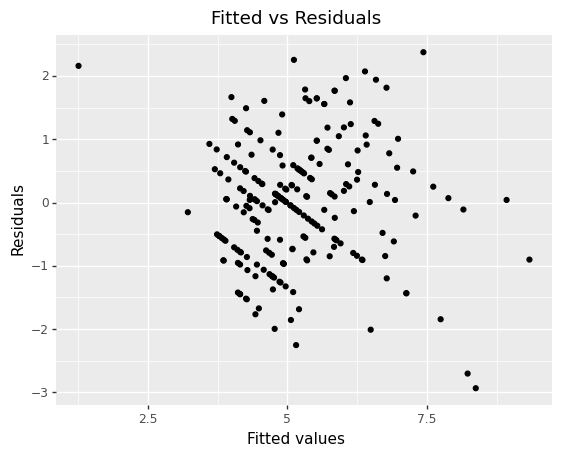

<ggplot: (8766072324777)>

In [110]:
(
    p9.ggplot(mapping = p9.aes(x = 'model1.fittedvalues', 
                                            y = "model1.resid_pearson"))
    + p9.geom_point()
    + p9.labs(title = "Fitted vs Residuals", x = 'Fitted values', y = 'Residuals')
)



Leverage vs. Studentized Residuals


/Users/williecheng/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


Text(0, 0.5, 'Studentized Residuals')

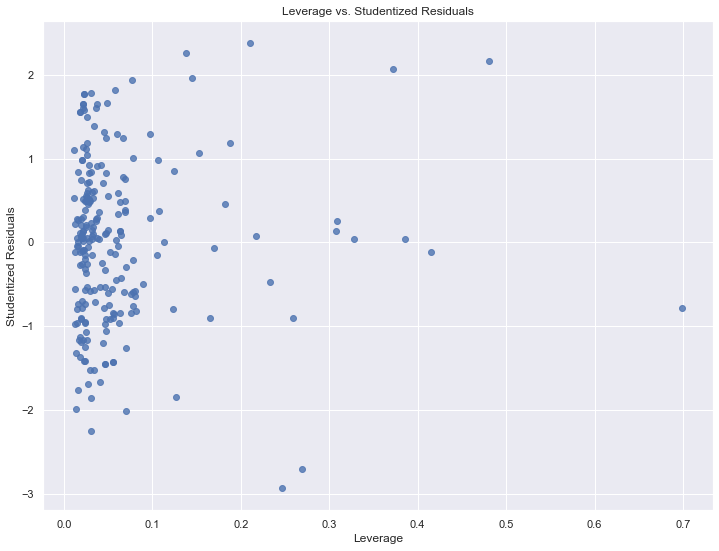

In [111]:
influence = model1.get_influence()
inf_sum = influence.summary_frame()
resid = influence.resid_studentized_external
leverage = influence.hat_matrix_diag


print ('\n')
print ('Leverage vs. Studentized Residuals')
sns.regplot(leverage, model1.resid_pearson,  fit_reg=False)
plt.title('Leverage vs. Studentized Residuals')
plt.xlabel('Leverage')
plt.ylabel('Studentized Residuals')


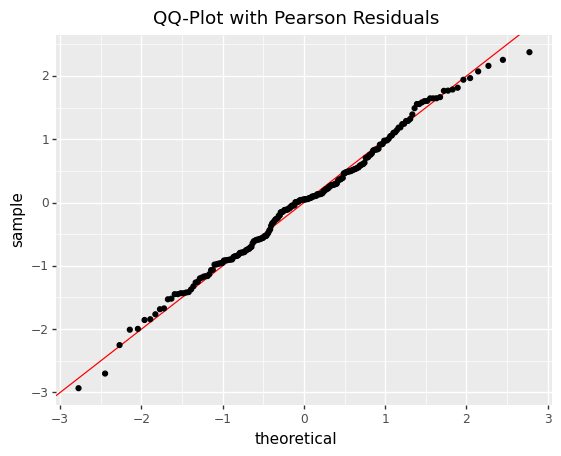

<ggplot: (8765970956770)>

In [112]:
import plotnine as p9
(
    p9.ggplot(mapping = p9.aes(sample = "model1.resid_pearson"))
    + p9.geom_abline(p9.aes(intercept = 0, slope = 1), color = 'red')
    + p9.stats.stat_qq()
    + p9.labs(title = "QQ-Plot with Pearson Residuals")
)

In [115]:
corr=final1.corr()
corr.style.background_gradient(cmap='coolwarm')

,price,Total Fat,Cholesterol,Sodium,Potassium,Total Sugars,Dietary Fiber,Calcium,Iron,Calories,Added Sugars,Total Carbohydrate,Saturated Fat,Protein
price,1.000000,0.092130,0.327472,-0.056050,0.187481,0.281560,0.265398,-0.201806,-0.095684,-0.003430,0.208652,-0.035252,0.175624,-0.029637
Total Fat,0.092130,1.000000,0.077630,0.177951,0.250795,0.139890,0.145904,0.138614,0.158452,0.204871,0.228090,0.134382,0.095476,0.102004
Cholesterol,0.327472,0.077630,1.000000,-0.078999,0.212002,0.292152,-0.067242,-0.031017,-0.049390,0.112459,0.256214,-0.076486,0.608790,-0.030728
Sodium,-0.056050,0.177951,-0.078999,1.000000,0.299980,0.243857,0.347280,0.094541,0.226288,0.748443,0.208559,0.700250,0.010648,0.615598
Potassium,0.187481,0.250795,0.212002,0.299980,1.000000,0.417768,0.393274,0.182005,0.138291,0.516971,0.334394,0.406710,0.174063,0.482576
Total Sugars,0.281560,0.139890,0.292152,0.243857,0.417768,1.000000,0.083173,-0.021657,0.070094,0.546177,0.849842,0.535998,0.353663,0.224609
Dietary Fiber,0.265398,0.145904,-0.067242,0.347280,0.393274,0.083173,1.000000,0.203787,0.104896,0.225807,0.081807,0.132566,0.042332,0.503930
Calcium,-0.201806,0.138614,-0.031017,0.094541,0.182005,-0.021657,0.203787,1.000000,0.167471,0.067637,0.023922,0.059437,0.014672,0.152557
Iron,-0.095684,0.158452,-0.049390,0.226288,0.138291,0.070094,0.104896,0.167471,1.000000,0.212608,0.141135,0.173368,0.028963,0.250200
Calories,-0.003430,0.204871,0.112459,0.748443,0.516971,0.546177,0.225807,0.067637,0.212608,1.000000,0.483221,0.897486,0.280721,0.629323


In [116]:
# load statmodels functions
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# compute the vif for all given features
def compute_vif(considered_features):
    X = final1[considered_features]
    # the calculation of variance inflation requires a constant
    X['intercept'] = 1
    
    # create dataframe to store vif values
    vif = pd.DataFrame()
    vif["Variable"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif = vif[vif['Variable']!='intercept']
    return vif

In [117]:
# features to consider removing
considered_features = ['Calories','Sodium','Potassium','Added Sugars','Total Carbohydrate', 'Total Sugars','Saturated Fat','Protein']

# compute vif 
compute_vif(considered_features).sort_values('VIF', ascending=False)


/var/folders/xk/bzswhdp94nzc63thcm13886w0000gn/T/ipykernel_57194/81233558.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,Variable,VIF
0,Calories,10.714543
4,Total Carbohydrate,7.119850
5,Total Sugars,4.313632
3,Added Sugars,4.035020
1,Sodium,2.930893
7,Protein,2.226553
2,Potassium,1.637669
6,Saturated Fat,1.628396


In [118]:
# features to consider removing
considered_features = ['Sodium','Potassium','Added Sugars','Total Carbohydrate', 'Total Sugars','Saturated Fat','Protein']

# compute vif 
compute_vif(considered_features).sort_values('VIF', ascending=False)

/var/folders/xk/bzswhdp94nzc63thcm13886w0000gn/T/ipykernel_57194/81233558.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,Variable,VIF
4,Total Sugars,4.312239
2,Added Sugars,4.018837
3,Total Carbohydrate,2.858007
0,Sodium,2.499207
6,Protein,2.099510
1,Potassium,1.518412
5,Saturated Fat,1.220264


We remove Calories and now every VIF value <5.

## Model part

In [119]:
# independent variable
x = final1.drop(columns = ['price','Calories'])
x = sm.add_constant(x)
x

,const,Total Fat,Cholesterol,Sodium,Potassium,Total Sugars,Dietary Fiber,Calcium,Iron,Added Sugars,Total Carbohydrate,Saturated Fat,Protein
0,1.0,2,15,75,44.0,5,1,15,1,5.0,15,1,3.0
1,1.0,2,0,190,40.0,2,2,0,0,0.0,21,0,3.0
2,1.0,1,0,350,90.0,1,1,10,2,1.0,31,0,5.0
3,1.0,15,0,125,0.0,2,1,0,4,2.0,14,0,2.0
4,1.0,0,0,80,40.0,0,0,10,2,0.0,25,0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
221,1.0,1,0,400,0.0,2,2,60,13,2.0,18,0,4.0
222,1.0,1,0,400,0.0,2,2,60,13,2.0,18,0,4.0
223,1.0,5,0,100,40.0,1,1,5,0,1.0,21,0,4.0
224,1.0,1,0,150,0.0,2,2,50,13,2.0,18,0,4.0


In [120]:
# model1 full model
model1 = sm.OLS(final1["price"], x).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.352
Model:                            OLS   Adj. R-squared:                  0.315
Method:                 Least Squares   F-statistic:                     9.632
Date:                Thu, 01 Dec 2022   Prob (F-statistic):           6.86e-15
Time:                        00:13:14   Log-Likelihood:                -405.92
No. Observations:                 226   AIC:                             837.8
Df Residuals:                     213   BIC:                             882.3
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  5.2747      0.277     19.054      0.000       4.729       5.820
Total Fat              0.0127      0.011      1.126      0.261      -0.010       0.035
Cholesterol            0.0859      0.021      4.099      0.000       0.045       0.127
Sodium                -0.0014      0.001     -0.963      0.336      -0.004       0.001
Potassium              0.0011      0.003      0.383      0.702      -0.004       0.007
Total Sugars           0.2670      0.081      3.282      0.001       0.107       0.427
Dietary Fiber          0.3429      0.055      6.285      0.000       0.235       0.450
Calcium               -0.0095      0.002     -4.081      0.000      -0.014      -0.005
Iron                  -0.0037      0.010     -0.375      0.708      -0.023       0.016
Added Sugars          -0.1352      0.088     -1.538      0.125      -0.308       0.038
Total Carbohydrate    -0.0019      0.017     -0.111      0.912      -0.036       0.032
Saturated Fat         -0.0265      0.021     -1.240      0.217      -0.069       0.016
Protein               -0.1806      0.068     -2.645      0.009      -0.315      -0.046
==============================================================================
Omnibus:                        0.144   Durbin-Watson:                   1.918
Prob(Omnibus):                  0.931   Jarque-Bera (JB):                0.024
Skew:                           0.009   Prob(JB):                        0.988
Kurtosis:                       3.047   Cond. No.                         740.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [121]:
model1.bic

882.3107800962105

In [98]:
#feature = ['Total Fat','Cholesterol']

In [108]:
#p_values = model1.summary2().tables[1]

In [112]:
#p_values.index

Index(['Total Fat', 'Cholesterol', 'Sodium', 'Potassium', 'Total Sugars',
       'Dietary Fiber', 'Calcium', 'Iron', 'Added Sugars',
       'Total Carbohydrate', 'Saturated Fat', 'Protein'],
      dtype='object')

In [122]:
#BIC selection (backward)
import itertools
def backward(predictors):
    
    tic = time.time()
    
    results = []
    
    for combo in itertools.combinations(predictors, len(predictors)-1):
        results.append(processSubset(combo))
    
    # Wrap everything up in a nice dataframe
    models = pd.DataFrame(results)
    
    # Choose the model with the highest RSS
    best_model = models.loc[models['RSS'].argmin()]
    
    toc = time.time()
    print("Processed ", models.shape[0], "models on", len(predictors)-1, "predictors in", (toc-tic), "seconds.")
    
    # Return the best model, along with some other useful information about the model
    return best_model

In [123]:
def processSubset(feature_set):
    # Fit model on feature_set and calculate RSS
    model = sm.OLS(y,x[list(feature_set)])
    regr = model.fit()
    RSS = ((regr.predict(x[list(feature_set)]) - y) ** 2).sum()
    return {"model":regr, "RSS":RSS}

In [124]:
y = final1['price']

models_bwd = pd.DataFrame(columns=["RSS", "model"], index = range(1,len(x.columns)))

tic = time.time()
predictors = x.columns

while(len(predictors) > 1):  
    models_bwd.loc[len(predictors)-1] = backward(predictors)
    predictors = models_bwd.loc[len(predictors)-1]["model"].model.exog_names

#toc = time.time()
#print("Total elapsed time:", (toc-tic), "seconds.")

Processed  13 models on 12 predictors in 0.05974221229553223 seconds.
Processed  12 models on 11 predictors in 0.01671004295349121 seconds.
Processed  11 models on 10 predictors in 0.019736051559448242 seconds.
Processed  10 models on 9 predictors in 0.014116048812866211 seconds.
Processed  9 models on 8 predictors in 0.013414859771728516 seconds.
Processed  8 models on 7 predictors in 0.008763790130615234 seconds.
Processed  7 models on 6 predictors in 0.009266853332519531 seconds.
Processed  6 models on 5 predictors in 0.007436990737915039 seconds.
Processed  5 models on 4 predictors in 0.006204128265380859 seconds.
Processed  4 models on 3 predictors in 0.00455021858215332 seconds.
Processed  3 models on 2 predictors in 0.0036110877990722656 seconds.
Processed  2 models on 1 predictors in 0.002819061279296875 seconds.


In [125]:
print("-------------------")
print("Backward Selection:")
print("-------------------")
temp_bic = model1.bic
for i in range(len(x.columns)):
    model2_bic = models_bwd.loc[len(x.columns)-1-i, "model"].bic
    if temp_bic > model2_bic:
        temp_bic = model2_bic
        print(models_bwd.loc[len(x.columns)-1-i, "model"].params)
        print(f'BIC:{model2_bic}')
        print("-------------------")
    elif temp_bic < model2_bic:
        print(models_bwd.loc[len(x.columns)-1-i, "model"].params)
        print(f'BIC:{model2_bic}')
        break
      

-------------------
Backward Selection:
-------------------
const            5.264136
Total Fat        0.012791
Cholesterol      0.086507
Sodium          -0.001475
Potassium        0.001015
Total Sugars     0.265037
Dietary Fiber    0.344958
Calcium         -0.009525
Iron            -0.003640
Added Sugars    -0.136380
Saturated Fat   -0.026599
Protein         -0.182159
dtype: float64
BIC:876.9033270075145
-------------------
const            5.259066
Total Fat        0.013496
Cholesterol      0.087951
Sodium          -0.001505
Total Sugars     0.270517
Dietary Fiber    0.348991
Calcium         -0.009428
Iron            -0.003632
Added Sugars    -0.136368
Saturated Fat   -0.027373
Protein         -0.174993
dtype: float64
BIC:871.6264804728895
-------------------
const            5.261341
Total Fat        0.013152
Cholesterol      0.088280
Sodium          -0.001527
Total Sugars     0.274788
Dietary Fiber    0.350562
Calcium         -0.009527
Added Sugars    -0.142074
Saturated Fat   -0.0

In [126]:
x = final1 [['Cholesterol','Total Sugars','Dietary Fiber','Calcium','Protein']]
x = sm.add_constant(x)
y = final1['price']
finalmodel = sm.OLS(y, x).fit()
finalmodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.326
Model:                            OLS   Adj. R-squared:                  0.311
Method:                 Least Squares   F-statistic:                     21.29
Date:                Thu, 01 Dec 2022   Prob (F-statistic):           2.36e-17
Time:                        00:14:49   Log-Likelihood:                -410.31
No. Observations:                 226   AIC:                             832.6
Df Residuals:                     220   BIC:                             853.1
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             5.2081      0.233     22.332      0.000       4.749       5.668
Cholesterol       0.0773      0.016      4.790      0.000       0.046       0.109
Total Sugars      0.1463      0.041      3.607      0.000       0.066       0.226
Dietary Fiber     0.3384      0.049      6.850      0.000       0.241       0.436
Calcium          -0.0097      0.002     -4.230      0.000      -0.014      -0.005
Protein          -0.2000      0.051     -3.901      0.000      -0.301      -0.099
==============================================================================
Omnibus:                        0.792   Durbin-Watson:                   1.878
Prob(Omnibus):                  0.673   Jarque-Bera (JB):                0.777
Skew:                           0.141   Prob(JB):                        0.678
Kurtosis:                       2.946   Cond. No.                         136.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

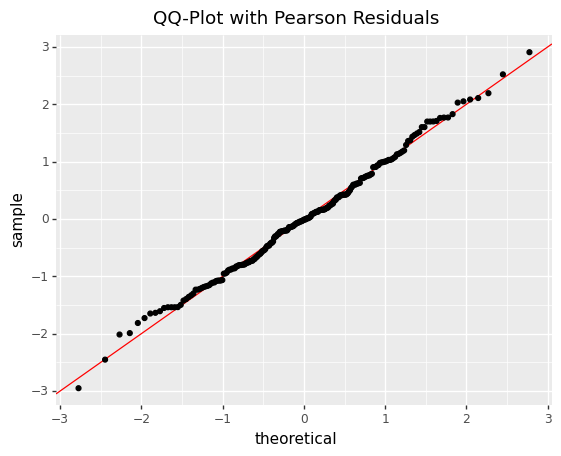

<ggplot: (8766041449581)>

In [127]:
import plotnine as p9
(
    p9.ggplot(mapping = p9.aes(sample = "finalmodel.resid_pearson"))
    + p9.geom_abline(p9.aes(intercept = 0, slope = 1), color = 'red')
    + p9.stats.stat_qq()
    + p9.labs(title = "QQ-Plot with Pearson Residuals")
)

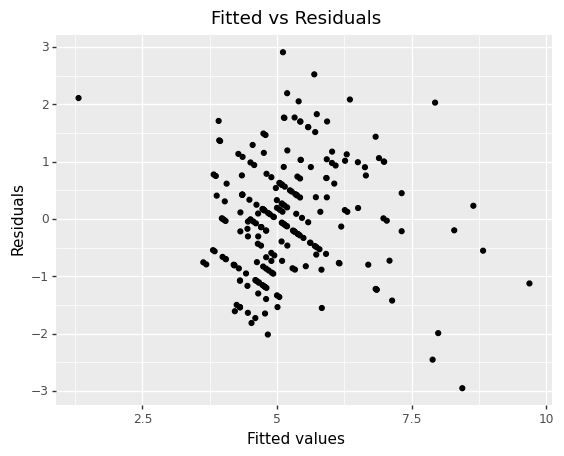

<ggplot: (8766055338256)>

In [128]:
(
    p9.ggplot(mapping = p9.aes(x = 'finalmodel.fittedvalues', 
                                            y = "finalmodel.resid_pearson"))
    + p9.geom_point()
    + p9.labs(title = "Fitted vs Residuals", x = 'Fitted values', y = 'Residuals')
)

In [94]:
final2['price']= np.log(final2['price'])

In [96]:
model2 = sm.OLS(final2["price"], x).fit()

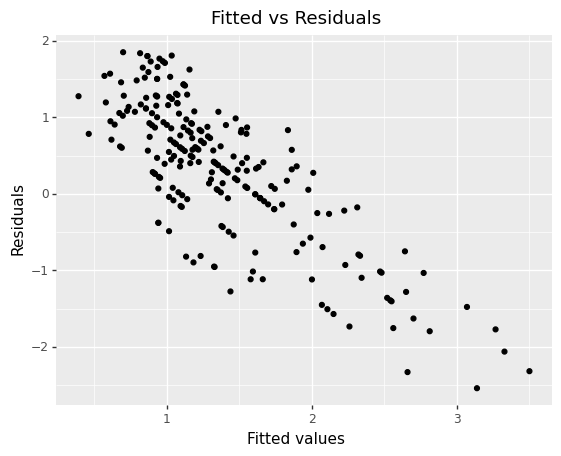

<ggplot: (8766055646043)>

In [97]:
(
    p9.ggplot(mapping = p9.aes(x = 'model2.fittedvalues', 
                                            y = "model2.resid_pearson"))
    + p9.geom_point()
    + p9.labs(title = "Fitted vs Residuals", x = 'Fitted values', y = 'Residuals')
)

In [14]:
x1 = house.drop(columns = ['price', 'Potassium', 'Total Fat', 'Iron'])
x1

,const,Cholesterol,Sodium,Total Sugars,Dietary Fiber,Calcium
0,1.0,15,75,5,1,15
1,1.0,0,190,2,2,0
2,1.0,0,350,1,1,10
3,1.0,0,125,2,1,0
4,1.0,0,80,0,0,10
...,...,...,...,...,...,...
221,1.0,0,400,2,2,60
222,1.0,0,400,2,2,60
223,1.0,0,100,1,1,5
224,1.0,0,150,2,2,50


In [15]:
#dropped variables with p values > 0.05
model1 = sm.OLS(final1["price"], x1).fit()

In [16]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.311
Model:                            OLS   Adj. R-squared:                  0.296
Method:                 Least Squares   F-statistic:                     19.88
Date:                Tue, 29 Nov 2022   Prob (F-statistic):           2.44e-16
Time:                        16:04:26   Log-Likelihood:                -412.78
No. Observations:                 226   AIC:                             837.6
Df Residuals:                     220   BIC:                             858.1
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             5.1450      0.244     21.050      0.000       4.663       5.627
Cholesterol       0.0741      0.016      4.507      0.000       0.042       0.107
Sodium           -0.0031      0.001     -3.184      0.002      -0.005      -0.001
Total Sugars      0.1453      0.041      3.510      0.001       0.064       0.227
Dietary Fiber     0.2928      0.046      6.333      0.000       0.202       0.384
Calcium          -0.0100      0.002     -4.344      0.000      -0.015      -0.005
==============================================================================
Omnibus:                        1.173   Durbin-Watson:                   1.891
Prob(Omnibus):                  0.556   Jarque-Bera (JB):                1.270
Skew:                           0.135   Prob(JB):                        0.530
Kurtosis:                       2.751   Cond. No.                         626.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""